In [1]:
import matplotlib.pyplot as plt
import loompy
import numpy as np
import numpy_groupies as npg
from colors import colorize

In [14]:
fibroblasts = 'HumanMeningesDev_Fibroblasts.loom'
fibroblasts_PCW13 = 'Recombined3Clean2_FB_C_Layerslineage_Age1213_Age13_C.loom'
fibroblasts_adult = 'HumanAdult_harmony_B_H_Clean.loom'
fibroblasts_mouse = 'Mouse_2020Pool_FibroblastVascular_Fibroblast.loom'

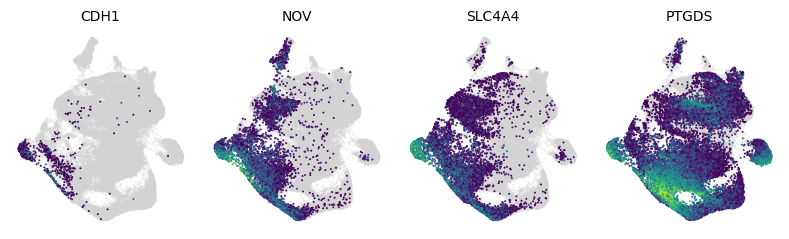

In [8]:
with loompy.connect(fibroblasts, 'r') as ds:
    plt.figure(None, (8, 2.5), facecolor='white')
    gs = plt.GridSpec(1, 4)

    to_plot = ['CDH1','NOV','SLC4A4','PTGDS'] # NOV = CCN3

    for i, g in enumerate(to_plot):
        plt.subplot(gs[i])
        exp = np.log(ds[np.where(ds.ra.Gene == g)[0][0], :].flatten() + 1)
        exp_cells = exp > 1
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], color='lightgrey', alpha=0.3, s=2, lw=0, rasterized=True)
        plt.scatter(ds.ca.UMAP[exp_cells, 0], ds.ca.UMAP[exp_cells, 1], c=exp[exp_cells], s=2, lw=0, rasterized=True)
        plt.axis('off')
        plt.title(g, fontsize=10)
        #plt.margins(0.0, 0.0)
        plt.tight_layout()
    plt.show()

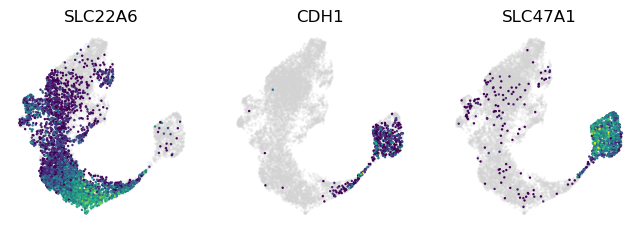

In [9]:
with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    plt.figure(None, (8, 2.5))
    gs = plt.GridSpec(1, 3)
    
    genes = ['SLC22A6','CDH1','SLC47A1']

    for i in range(len(genes)):
        plt.subplot(gs[i])
        exp = np.log(ds[ds.ra.Gene == genes[i], :].flatten() +1) 
        ix = exp > 1
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', lw=0, alpha=0.30, s=3)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', lw=0, s=3)
        plt.axis('off')
        plt.title(genes[i], fontsize=12) 

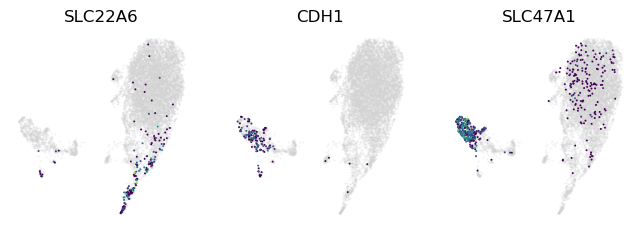

In [10]:
with loompy.connect(fibroblasts_adult, 'r') as ds:
    plt.figure(None, (8, 2.5))
    gs = plt.GridSpec(1, 3)
    
    genes = ['SLC22A6','CDH1','SLC47A1']

    for i in range(len(genes)):
        plt.subplot(gs[i])
        exp = np.log(ds[ds.ra.Gene == genes[i], :].flatten() +1) 
        ix = exp > 1
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', lw=0, alpha=0.30, s=2)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', lw=0, s=2)
        plt.axis('off')
        plt.title(genes[i], fontsize=12) 

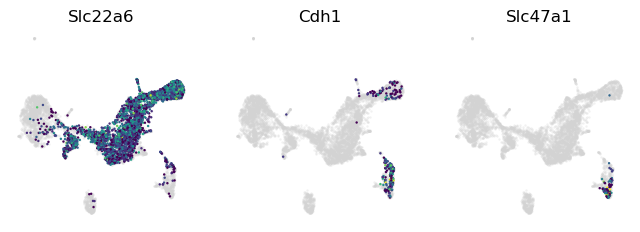

In [16]:
with loompy.connect(fibroblasts_mouse, 'r') as ds:
    plt.figure(None, (8, 2.5))
    gs = plt.GridSpec(1, 3)
    
    genes = ['Slc22a6','Cdh1','Slc47a1']

    for i in range(len(genes)):
        plt.subplot(gs[i])
        exp = np.log(ds[ds.ra.Gene == genes[i], :].flatten() +1) 
        ix = exp > 1
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', lw=0, alpha=0.30, s=3)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', lw=0, s=3)
        plt.axis('off')
        plt.title(genes[i], fontsize=12) 

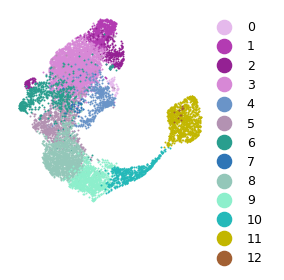

In [17]:
fig = plt.figure(None, (8, 2))
colors = ['#E5B9EC','#B33BB2','#942193','#D788D6','#6A94C8','#B392B2','#299E8E','#2E75B6','#94C7B9','#8DEFCC','#24B9B9','#c2b600','#A26033']

with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    xy = ds.ca.UMAP
    ax = fig.add_axes([0, 0, 0.25, 1])
    ClassAnn = np.unique(ds.ca.Clusters)
    for i,a in enumerate(ClassAnn):
        ix = (ds.ca.Clusters == a)
        
        ax.scatter(xy[ix, 0], xy[ix, 1], c=colors[i], lw=0, s=2)
        ax.axis('off')
    
    ax2 = fig.add_axes([0.28, 0, 0.05, 1])
    names = np.unique(ds.ca.Clusters)
    labels = np.unique(ds.ca.Clusters)
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.7,
		frameon=False,
		fontsize=9)
    ax2.axis('off')

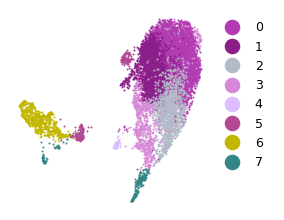

In [18]:
fig = plt.figure(None, (8, 2))
colors = ['#B33BB2','#8B1F8A','#B3BBC8','#D788D6','#DABEFF','#B34992','#c2b600','#348686']

with loompy.connect(fibroblasts_adult, 'r') as ds:
    xy = ds.ca.UMAP
    ax = fig.add_axes([0, 0, 0.25, 1])
    ClassAnn = np.unique(ds.ca.Clusters)
    for i,a in enumerate(ClassAnn):
        ix = (ds.ca.Clusters == a)
        
        ax.scatter(xy[ix, 0], xy[ix, 1], c=colors[i], lw=0, s=2)
        ax.axis('off')
    
    ax2 = fig.add_axes([0.28, 0, 0.05, 1])
    names = np.unique(ds.ca.Clusters)
    labels = np.unique(ds.ca.Clusters)
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.7,
		frameon=False,
		fontsize=9)
    ax2.axis('off')

# Expression of junction genes

In [19]:
tj_filt = ["MPP5", "PATJ", "MAGI1", "MAGI2", "MAGI3", "CGN", "RHOA", "TJAP1", "TJP1", "TJP2", "TJP3", "PRKCI", "CDC42", "PARD3", "PARD6A", "PARD6B", "PARD6G", "RAC1", "RAC2", "RAC3", "ACTB", "ACTG1", "ACTN1", "ACTN2", "ACTN3", "ACTN4","CRB3", "OCLN", "CLDN1", "CLDN10", "CLDN11", "CLDN14", "CLDN15", "CLDN16", "CLDN18", "CLDN2", "CLDN20", "CLDN22", "CLDN23", "CLDN3", "CLDN4", "CLDN5", "CLDN6", "CLDN7", "JAM2", "JAM3"]

In [20]:
# Filtered tight junction gene list in fetal

fracbyclusterid = []
with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x = np.vstack([xall[ds.ra.Gene == g, :][0] for g in tj_filt])
    xnew = np.where(x >= 0.05, 0.5, 0) #Threshold >= 5% cells/cluster

In [21]:
# Filtered tight junction gene list in adult

with loompy.connect(fibroblasts_adult, 'r') as ds2:
    fracbyclusterid = []
    cids = range(max(ds2.ca.Clusters)+1)
    for cid in cids:
        which = (ds2.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds2[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x2 = np.vstack([xall[ds2.ra.Gene == g, :][0] for g in tj_filt])
    x2new = np.where(x2 >= 0.05, 1, 0)

In [22]:
c11 = xnew[:, 11]
c6 = x2new[:, 6]
combined_iDura = np.add(c11, c6)
print(combined_iDura)

[1.5 1.5 1.5 1.5 1.5 0.  1.5 1.5 1.5 1.  0.  1.5 1.5 1.5 0.5 0.  1.5 1.5
 0.  0.5 1.5 1.5 1.5 0.  0.5 1.5 0.  1.5 0.  0.  0.  0.  0.5 0.  0.  0.
 0.  0.  0.  0.  0.  0.5 0.  0.  1.5 1.5]


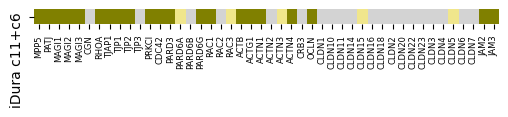

In [23]:
#IN INNER DURA FETAL CLUSTER 11, AND ADULT CLUSTER 6

from matplotlib.colors import ListedColormap, BoundaryNorm

genes = tj_filt
colors = ['lightgrey', 'khaki', 'darkkhaki', 'olive']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N)  # Define color boundaries

# Ensure combined_iDura is 2D for imshow
combined_iDura = combined_iDura.reshape(1, -1)  # Convert to shape (1, num_genes)

plt.figure(figsize=(6, 0.2))
plt.imshow(combined_iDura, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['iDura c11+c6'], fontsize=10, rotation='vertical')
plt.box(False)
#plt.savefig('/TJfilt_HM_adultfirst_combined_iDura11.pdf',dpi=300)
plt.show()

In [24]:
c10 = xnew[:, 10]
c7 = x2new[:, 7]
combined_ArB = np.add(c10, c7)
print(combined_ArB)

[1.5 1.5 1.5 1.5 1.5 0.  1.5 1.5 1.5 1.  0.  1.5 1.5 1.5 0.  0.  1.5 1.5
 0.  0.5 1.5 1.5 1.5 0.  0.  1.5 0.  1.  0.  0.  0.5 0.  0.5 0.  0.  0.
 0.  0.  0.  0.  0.  0.5 0.  0.  1.5 1.5]


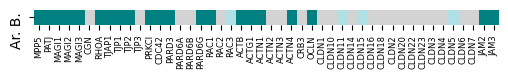

In [25]:
#IN ARACHNOID BARRIER FETAL CLUSTER 10, AND ADULT CLUSTER 7

genes = tj_filt
colors = ['lightgrey','powderblue','mediumturquoise','teal']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N) 

combined_ArB = combined_ArB.reshape(1, -1) 

plt.figure(figsize=(6, 0.2))
plt.imshow(combined_ArB, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['Ar. B.'], fontsize=10, rotation='vertical')
plt.box(False)
#plt.savefig('/TJfilt_HM_adultfirst_combined_ArB.pdf',dpi=300)
plt.show()

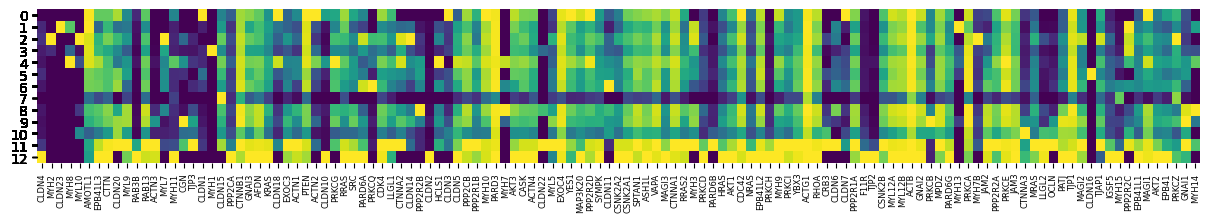

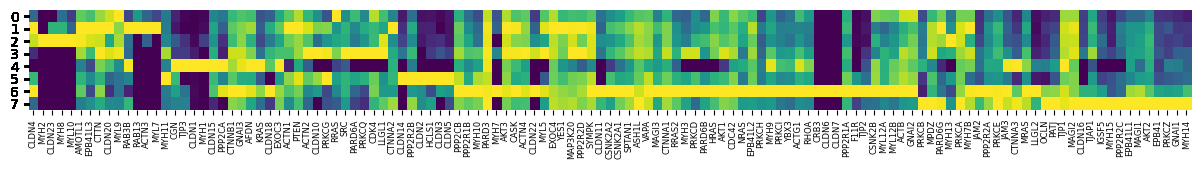

In [27]:
#WHOLE KEGG TIGHT JUNCTION GENE LIST

import scipy.cluster.hierarchy as hc

plt.figure(None, (15, 2))
genes = ['CLDN4', 'MYH2', 'CLDN23', 'MYH8', 'MYL10', 'AMOTL1', 'EPB41L3', 'CTTN', 'CLDN20', 'MYL9', 'RAB3B', 'RAB13', 'ACTN3', 'MYL7', 'MYH11', 'CGN', 'TJP3', 'CLDN1', 'MYH1', 'CLDN15', 'PPP2CA', 'CTNNB1', 'GNAI3', 'AFDN', 'KRAS', 'CLDN18', 'EXOC3', 'ACTN1', 'PTEN', 'ACTN2', 'CLDN10', 'PRKCG', 'RRAS', 'SRC', 'PARD6A', 'PRKCQ', 'CDK4', 'LLGL1', 'CTNNA2', 'CLDN14', 'PPP2R2B', 'CLDN2', 'HCLS1', 'CLDN3', 'CLDN5', 'PPP2CB', 'PPP2R1B', 'MYH10', 'PARD3', 'MYH7', 'AKT3', 'CASK', 'ACTN4', 'CLDN22', 'MYL5', 'EXOC4', 'YES1', 'MAP3K20', 'PPP2R2D', 'SYMPK', 'CLDN11', 'CSNK2A2', 'CSNK2A1', 'SPTAN1', 'ASH1L', 'VAPA', 'MAGI3', 'CTNNA1', 'RRAS2', 'MYH3', 'PRKCD', 'PARD6B', 'HRAS', 'AKT1', 'CDC42', 'NRAS', 'EPB41L2', 'PRKCH', 'MYH9', 'PRKCI', 'YBX3', 'ACTG1', 'RHOA', 'CRB3', 'CLDN6', 'CLDN7', 'PPP2R1A', 'F11R', 'TJP2', 'CSNK2B', 'MYL12A', 'MYL12B', 'ACTB', 'GNAI2', 'PRKCB', 'MPDZ', 'PARD6G', 'MYH13', 'PRKCA', 'MYH7B', 'JAM2', 'PPP2R2A', 'PRKCE', 'JAM3', 'CTNNA3', 'MRAS', 'LLGL2', 'OCLN', 'PATJ', 'TJP1', 'MAGI2', 'CLDN16', 'TJAP1', 'IGSF5', 'MYH15', 'PPP2R2C', 'EPB41L1', 'MAGI1', 'AKT2', 'EPB41', 'PRKCZ', 'GNAI1', 'MYH14']

with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    fracbyclusterid = []
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x = np.vstack([xall[ds.ra.Gene == g, :][0] for g in genes])
    x = (x.T / np.max(x, axis=1)).T #Normalises per gene for this heatmap visualisation only
    
    plt.imshow(x.T, aspect='auto', cmap="viridis", interpolation='nearest')

    plt.box(on=None)
    plt.xticks(range(len(genes)), genes, fontsize=6, rotation = 'vertical')
    plt.yticks(ds.ca.Clusters)
    #plt.savefig('TJ_HM_adultfirst_foetal.pdf', dpi=300)

plt.figure(None, (15, 1.3))
with loompy.connect(fibroblasts_adult, 'r') as ds:

    fracbyclusterid = []
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    x2all = np.stack(fracbyclusterid).T
    x2 = np.vstack([x2all[ds.ra.Gene == g, :][0] for g in genes])
    x2 = (x2.T / np.max(x2, axis=1)).T #Normalises per gene for this heatmap visualisation only
    
    plt.imshow(x2.T, aspect='auto', cmap="viridis", interpolation='nearest')

    plt.box(on=None)
    plt.xticks(range(len(genes)), genes, fontsize=6, rotation = 'vertical')
    plt.yticks(ds.ca.Clusters)
    #plt.savefig('TJ_HM_adultfirst_adult.pdf', dpi=300)

In [28]:
genes = ['CLDN4', 'MYH2', 'CLDN23', 'MYH8', 'MYL10', 'AMOTL1', 'EPB41L3', 'CTTN', 'CLDN20', 'MYL9', 'RAB3B', 'RAB13', 'ACTN3', 'MYL7', 'MYH11', 'CGN', 'TJP3', 'CLDN1', 'MYH1', 'CLDN15', 'PPP2CA', 'CTNNB1', 'GNAI3', 'AFDN', 'KRAS', 'CLDN18', 'EXOC3', 'ACTN1', 'PTEN', 'ACTN2', 'CLDN10', 'PRKCG', 'RRAS', 'SRC', 'PARD6A', 'PRKCQ', 'CDK4', 'LLGL1', 'CTNNA2', 'CLDN14', 'PPP2R2B', 'CLDN2', 'HCLS1', 'CLDN3', 'CLDN5', 'PPP2CB', 'PPP2R1B', 'MYH10', 'PARD3', 'MYH7', 'AKT3', 'CASK', 'ACTN4', 'CLDN22', 'MYL5', 'EXOC4', 'YES1', 'MAP3K20', 'PPP2R2D', 'SYMPK', 'CLDN11', 'CSNK2A2', 'CSNK2A1', 'SPTAN1', 'ASH1L', 'VAPA', 'MAGI3', 'CTNNA1', 'RRAS2', 'MYH3', 'PRKCD', 'PARD6B', 'HRAS', 'AKT1', 'CDC42', 'NRAS', 'EPB41L2', 'PRKCH', 'MYH9', 'PRKCI', 'YBX3', 'ACTG1', 'RHOA', 'CRB3', 'CLDN6', 'CLDN7', 'PPP2R1A', 'F11R', 'TJP2', 'CSNK2B', 'MYL12A', 'MYL12B', 'ACTB', 'GNAI2', 'PRKCB', 'MPDZ', 'PARD6G', 'MYH13', 'PRKCA', 'MYH7B', 'JAM2', 'PPP2R2A', 'PRKCE', 'JAM3', 'CTNNA3', 'MRAS', 'LLGL2', 'OCLN', 'PATJ', 'TJP1', 'MAGI2', 'CLDN16', 'TJAP1', 'IGSF5', 'MYH15', 'PPP2R2C', 'EPB41L1', 'MAGI1', 'AKT2', 'EPB41', 'PRKCZ', 'GNAI1', 'MYH14']

with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    fracbyclusterid = []
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x = np.vstack([xall[ds.ra.Gene == g, :][0] for g in genes])
    #x = (x.T / np.max(x, axis=1)).T 

with loompy.connect(fibroblasts_adult, 'r') as ds:

    fracbyclusterid = []
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    x2all = np.stack(fracbyclusterid).T
    x2 = np.vstack([x2all[ds.ra.Gene == g, :][0] for g in genes])
    #x2 = (x2.T / np.max(x2, axis=1)).T 

In [29]:
xnew = np.where(x >= 0.05, 0.5, 0) #Give new value for stylised heatmap, with threshold of >= 5% cells per cluster
x2new = np.where(x2 >= 0.05, 1, 0)

In [30]:
c11 = xnew[:, 11]
c6 = x2new[:, 6]
combined_iDura = np.add(c11, c6)
print(combined_iDura)

[0.  0.  0.  0.  0.  1.5 1.5 1.5 0.  1.5 0.5 0.5 0.5 0.  0.  0.  0.  0.
 0.  0.5 0.5 1.5 1.5 1.5 1.5 0.  1.5 1.5 1.5 0.  0.  0.  1.5 1.5 0.5 0.
 1.5 0.5 1.  0.  1.  0.  0.  0.  0.5 1.5 1.5 1.5 1.5 0.  1.5 1.5 1.5 0.
 0.5 1.5 1.5 1.5 1.5 1.5 0.  1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 0.  0.5 0.
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 0.  0.  0.  1.5 1.5 1.  1.5
 1.5 1.5 1.5 1.5 0.5 1.5 1.5 0.  1.5 0.  1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 0.  1.5 0.5 0.  0.  1.5 1.5 1.5 1.5 1.5 1.5 0. ]


In [31]:
c10 = xnew[:, 10]
c7 = x2new[:, 7]
combined_ArB = np.add(c10, c7)
print(combined_ArB)

[0.  0.  0.  0.  0.  1.5 1.5 1.5 0.  1.5 0.  0.5 0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 1.5 1.5 1.5 1.5 0.  1.5 1.5 1.5 0.  0.  0.  0.5 1.5 0.  0.
 0.5 0.5 1.  0.  1.  0.  0.  0.  0.5 1.5 1.5 1.5 1.5 0.  1.5 1.5 1.5 0.
 0.5 1.5 1.5 1.5 1.5 1.5 0.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 0.  0.  0.
 0.5 1.5 1.5 0.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 0.  0.  0.  1.5 0.5 1.  0.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 0.  1.5 0.  1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.
 1.5 1.5 1.5 0.  1.5 0.5 0.  1.  1.5 1.5 1.5 1.5 1.  1.5 0. ]


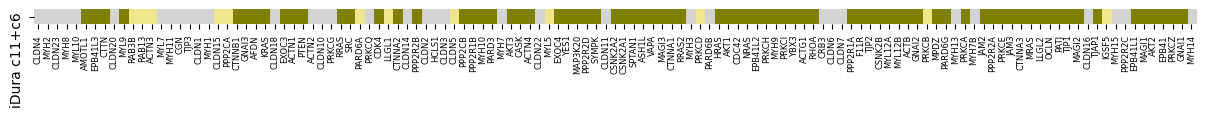

In [32]:
#INNER DURA

genes = genes
colors = ['lightgrey', 'khaki', 'darkkhaki', 'olive']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N)  

combined_iDura = combined_iDura.reshape(1, -1)  

plt.figure(figsize=(15, 0.2))
plt.imshow(combined_iDura, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['iDura c11+c6'], fontsize=10, rotation='vertical')
plt.box(False)
#plt.savefig('TJ_HM_adultfirst_combined_iDura11.pdf',dpi=300)
plt.show()

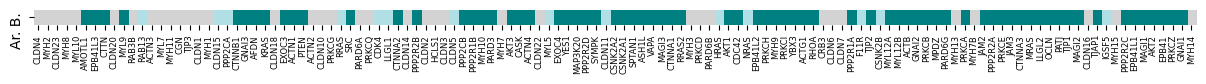

In [33]:
#ARACHNOID BARRIER

genes = genes
colors = ['lightgrey','powderblue','mediumturquoise','teal']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N)  

combined_ArB = combined_ArB.reshape(1, -1)  

plt.figure(figsize=(15, 0.2))
plt.imshow(combined_ArB, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['Ar. B.'], fontsize=10, rotation='vertical')
plt.box(False)
#plt.savefig('TJ_HM_adultfirst_combined_ArB.pdf',dpi=300)
plt.show()

## Adherens junctions

In [34]:
aj_filt = ["CTNNA1", "CTNNA2", "CTNNA3", "CTNNB1", "CTNND1", "AFDN","CDH1", "NECTIN1", "NECTIN2", "NECTIN3", "NECTIN4"]

In [35]:
# Filtered adherens junction gene list in fetal

fracbyclusterid = []
with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x = np.vstack([xall[ds.ra.Gene == g, :][0] for g in aj_filt])
    xnew = np.where(x >= 0.05, 0.5, 0)

In [36]:
# Filtered adherens junction gene list in adult

with loompy.connect(fibroblasts_adult, 'r') as ds2:
    fracbyclusterid = []
    cids = range(max(ds2.ca.Clusters)+1)
    for cid in cids:
        which = (ds2.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds2[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x2 = np.vstack([xall[ds2.ra.Gene == g, :][0] for g in aj_filt])
    x2new = np.where(x2 >= 0.05, 1, 0)

In [37]:
c11 = xnew[:, 11]
c6 = x2new[:, 6]
combined_iDura = np.add(c11, c6)
print(combined_iDura)

[1.5 1.  1.5 1.5 1.5 1.5 1.5 0.5 1.5 1.5 0. ]


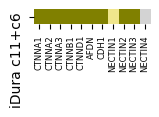

In [38]:
#IN INNER DURA FETAL CLUSTER 11, AND ADULT CLUSTER 6

genes = aj_filt
colors = ['lightgrey', 'khaki', 'darkkhaki', 'olive']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N)  

combined_iDura = combined_iDura.reshape(1, -1) 

plt.figure(figsize=(1.5, 0.2))
plt.imshow(combined_iDura, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['iDura c11+c6'], fontsize=10, rotation='vertical')
plt.box(False)
#plt.savefig('AJfilt_HM_adultfirst_combined_iDura11.pdf',dpi=300)
plt.show()

In [39]:
c10 = xnew[:, 10]
c7 = x2new[:, 7]
combined_ArB = np.add(c10, c7)
print(combined_ArB)

[1.5 1.  1.5 1.5 1.5 1.5 1.5 0.5 1.5 1.5 0. ]


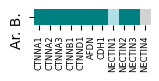

In [40]:
#IN ARACHNOID BARRIER FETAL CLUSTER 10, AND ADULT CLUSTER 7

genes = aj_filt

colors = ['lightgrey','powderblue','mediumturquoise','teal']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N) 

combined_ArB = combined_ArB.reshape(1, -1) 

plt.figure(figsize=(1.5, 0.2))
plt.imshow(combined_ArB, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['Ar. B.'], fontsize=10, rotation='vertical')
plt.box(False)
#plt.savefig('AJfilt_HM_adultfirst_combined_ArB.pdf',dpi=300)
plt.show()

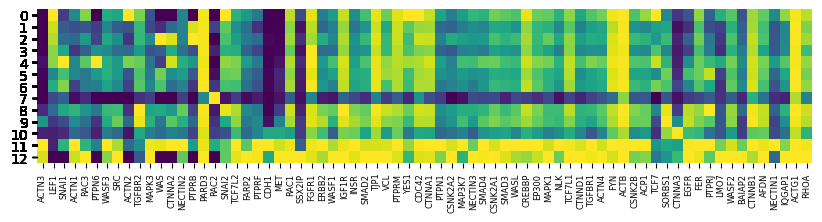

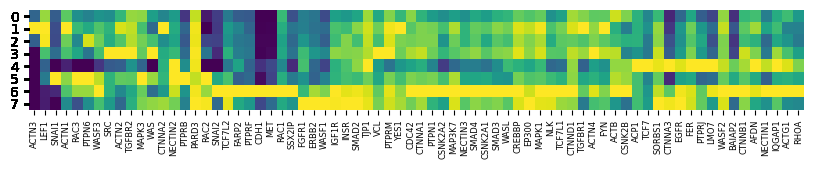

In [41]:
#WHOLE KEGG ADHERENS JUNCTION GENE LIST

import scipy.cluster.hierarchy as hc

plt.figure(None, (10, 2))
genes = ['ACTN3', 'LEF1', 'SNAI1', 'ACTN1', 'RAC3', 'PTPN6', 'WASF3', 'SRC', 'ACTN2', 'TGFBR2', 'MAPK3', 'WAS', 'CTNNA2', 'NECTIN2', 'PTPRB', 'PARD3', 'RAC2', 'SNAI2', 'TCF7L2', 'FARP2', 'PTPRF', 'CDH1', 'MET', 'RAC1', 'SSX2IP', 'FGFR1', 'ERBB2', 'WASF1', 'IGF1R', 'INSR', 'SMAD2', 'TJP1', 'VCL', 'PTPRM', 'YES1', 'CDC42', 'CTNNA1', 'PTPN1', 'CSNK2A2', 'MAP3K7', 'NECTIN3', 'SMAD4', 'CSNK2A1', 'SMAD3', 'WASL', 'CREBBP', 'EP300', 'MAPK1', 'NLK', 'TCF7L1', 'CTNND1', 'TGFBR1', 'ACTN4', 'FYN', 'ACTB', 'CSNK2B', 'ACP1', 'TCF7', 'SORBS1', 'CTNNA3', 'EGFR', 'FER', 'PTPRJ', 'LMO7', 'WASF2', 'BAIAP2', 'CTNNB1', 'AFDN', 'NECTIN1', 'IQGAP1', 'ACTG1', 'RHOA']

with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    fracbyclusterid = []
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x = np.vstack([xall[ds.ra.Gene == g, :][0] for g in genes])
    x = (x.T / np.max(x, axis=1)).T 
    
    plt.imshow(x.T, aspect='auto', cmap="viridis", interpolation='nearest')

    plt.box(on=None)
    plt.xticks(range(len(genes)), genes, fontsize=6, rotation = 'vertical')
    plt.yticks(ds.ca.Clusters)
    #plt.savefig('AJ_HM_adultfirst_foetal.pdf', dpi=300)

plt.figure(None, (10, 1.3))
with loompy.connect(fibroblasts_adult, 'r') as ds:

    fracbyclusterid = []
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    x2all = np.stack(fracbyclusterid).T
    x2 = np.vstack([x2all[ds.ra.Gene == g, :][0] for g in genes])
    x2 = (x2.T / np.max(x2, axis=1)).T 
    
    plt.imshow(x2.T, aspect='auto', cmap="viridis", interpolation='nearest')

    plt.box(on=None)
    plt.xticks(range(len(genes)), genes, fontsize=6, rotation = 'vertical')
    plt.yticks(ds.ca.Clusters)
    #plt.savefig('AJ_HM_adultfirst_adult.pdf', dpi=300)

In [42]:
genes = ['ACTN3', 'LEF1', 'SNAI1', 'ACTN1', 'RAC3', 'PTPN6', 'WASF3', 'SRC', 'ACTN2', 'TGFBR2', 'MAPK3', 'WAS', 'CTNNA2', 'NECTIN2', 'PTPRB', 'PARD3', 'RAC2', 'SNAI2', 'TCF7L2', 'FARP2', 'PTPRF', 'CDH1', 'MET', 'RAC1', 'SSX2IP', 'FGFR1', 'ERBB2', 'WASF1', 'IGF1R', 'INSR', 'SMAD2', 'TJP1', 'VCL', 'PTPRM', 'YES1', 'CDC42', 'CTNNA1', 'PTPN1', 'CSNK2A2', 'MAP3K7', 'NECTIN3', 'SMAD4', 'CSNK2A1', 'SMAD3', 'WASL', 'CREBBP', 'EP300', 'MAPK1', 'NLK', 'TCF7L1', 'CTNND1', 'TGFBR1', 'ACTN4', 'FYN', 'ACTB', 'CSNK2B', 'ACP1', 'TCF7', 'SORBS1', 'CTNNA3', 'EGFR', 'FER', 'PTPRJ', 'LMO7', 'WASF2', 'BAIAP2', 'CTNNB1', 'AFDN', 'NECTIN1', 'IQGAP1', 'ACTG1', 'RHOA']

with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    fracbyclusterid = []
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x = np.vstack([xall[ds.ra.Gene == g, :][0] for g in genes])
    #x = (x.T / np.max(x, axis=1)).T 

with loompy.connect(fibroblasts_adult, 'r') as ds:
    fracbyclusterid = []
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    x2all = np.stack(fracbyclusterid).T
    x2 = np.vstack([x2all[ds.ra.Gene == g, :][0] for g in genes])
    #x2 = (x2.T / np.max(x2, axis=1)).T 

In [43]:
xnew = np.where(x >= 0.05, 0.5, 0)
x2new = np.where(x2 >= 0.05, 1, 0)

In [44]:
#Inner dura cluster 11 in fetal, and cluster 6 in adult

c11 = xnew[:, 11]
c6 = x2new[:, 6]
combined_iDura = np.add(c11, c6)
print(combined_iDura)

[0.5 1.5 0.5 1.5 0.5 0.  1.5 1.5 0.  1.5 1.5 0.  1.  1.5 0.  1.5 0.  1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 0.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 0.5 1.5 1.5 1.5]


In [45]:
# Arachnoid barrier cluster 10 in fetal, and cluster 7 in adult

c10 = xnew[:, 10]
c7 = x2new[:, 7]
combined_ArB = np.add(c10, c7)
print(combined_ArB)

[0.  0.5 0.  1.5 0.5 0.  1.5 1.5 0.  1.5 1.5 0.  1.  1.5 0.  1.5 0.  0.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 0.5 1.5 0.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 0.5 1.5 1.5 0.5 1.5 1.5 1.5]


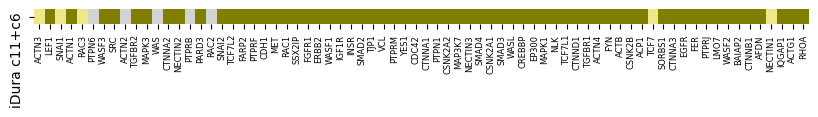

In [46]:
genes = genes

colors = ['lightgrey', 'khaki', 'darkkhaki', 'olive']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N)  

combined_iDura = combined_iDura.reshape(1, -1)  

plt.figure(figsize=(10, 0.2))
plt.imshow(combined_iDura, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['iDura c11+c6'], fontsize=10, rotation='vertical')
plt.box(False)
#plt.savefig('AJ_HM_adultfirst_combined_iDura11.pdf',dpi=300)
plt.show()

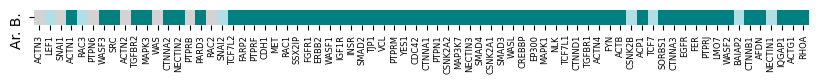

In [47]:
#ARACHNOID BARRIER

genes = genes
colors = ['lightgrey','powderblue','mediumturquoise','teal']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N)  

combined_ArB = combined_ArB.reshape(1, -1)  

plt.figure(figsize=(10, 0.2))
plt.imshow(combined_ArB, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['Ar. B.'], fontsize=10, rotation='vertical')
plt.box(False)
#plt.savefig('AJ_HM_adultfirst_combined_ArB.pdf',dpi=300)
plt.show()

## Tricellular junctions

In [48]:
Tr_junctions = ['MARVELD2','MARVELD3','LSR','ILDR1','ILDR2']

In [49]:
fracbyclusterid = []
with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    cids = range(max(ds.ca.Clusters)+1)
    for cid in cids:
        which = (ds.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x = np.vstack([xall[ds.ra.Gene == g, :][0] for g in Tr_junctions])
    xnew = np.where(x >= 0.05, 0.5, 0)

In [50]:
with loompy.connect(fibroblasts_adult, 'r') as ds2:
    fracbyclusterid = []
    cids = range(max(ds2.ca.Clusters)+1)
    for cid in cids:
        which = (ds2.ca.Clusters==cid)
        ncells = sum(which)
        vals = ds2[:,which]
        nnz = np.count_nonzero(vals, axis=1)
        fracs = nnz / ncells
        fracbyclusterid.append(np.array(fracs))
    xall = np.stack(fracbyclusterid).T
    x2 = np.vstack([xall[ds2.ra.Gene == g, :][0] for g in Tr_junctions])
    x2new = np.where(x2 >= 0.05, 1, 0)

In [51]:
c11 = xnew[:, 11]
c6 = x2new[:, 6]
combined_iDura = np.add(c11, c6)
print(combined_iDura)

[0.5 0.5 1.5 0.  1. ]


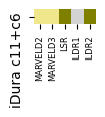

In [52]:
#IN INNER DURA FETAL CLUSTER 11, AND ADULT CLUSTER 6

from matplotlib.colors import ListedColormap, BoundaryNorm
genes = Tr_junctions

colors = ['lightgrey', 'khaki', 'darkkhaki', 'olive']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N)  

combined_iDura = combined_iDura.reshape(1, -1)

plt.figure(figsize=(0.8, 0.2))
plt.imshow(combined_iDura, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['iDura c11+c6'], fontsize=10, rotation='vertical')
plt.box(False)
plt.savefig('Tricellular_HM_combined_iDura11.pdf',dpi=300)
plt.show()

In [53]:
c10 = xnew[:, 10]
c7 = x2new[:, 7]
combined_ArB = np.add(c10, c7)
print(combined_ArB)

[0.  1.5 0.5 0.  1. ]


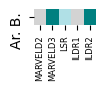

In [54]:
#IN ARACHNOID BARRIER FETAL CLUSTER 10, AND ADULT CLUSTER 7

genes = Tr_junctions
colors = ['lightgrey','powderblue','mediumturquoise','teal']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 0.5, 1, 1.5], cmap.N)  

combined_ArB = combined_ArB.reshape(1, -1)  

plt.figure(figsize=(0.8, 0.2))
plt.imshow(combined_ArB, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

plt.xticks(range(len(genes)), genes, fontsize=6, rotation='vertical')
plt.yticks([0], ['Ar. B.'], fontsize=10, rotation='vertical')
plt.box(False)
#plt.savefig('Tricellular_HM_combined_ArB.pdf',dpi=300)
plt.show()